In [1]:
import matplotlib
matplotlib.use('Agg')
%pylab inline

import commands
import os
import sys
import time

import shutil
import os

import h5py

from pylab import *
import numpy as np
import scipy
from scipy import interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import json
import pylab
import numpy

from pylab import *
from scipy import *

from scipy          import optimize
from scipy.optimize import curve_fit

from numpy.linalg import inv
import re
import mmap
from linecache import getline

import dqmc_analysis_tools as dqmc

####################################################
#  parameters
####################################################
seed = 1234567
Vs = [3.2, 2.8, 2.4, 2.0, 1.6, 1.2, 0.8]
Vs = [2.0]
tperps = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2]
U = 4
Ns = [16, 36, 64, 100]
betas = [1.0, 1.2, 1.5, 1.6, 2.0, 2.2, 2.5, 2.8, 3.0, \
         3.2, 3.5, 4.0, 4.2, 5.0, 6.0, 7.0, 8.0, 10.0, 12.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]
#Ls    = [50,  60,  70,  80,  80,   100,   120,  160, 320]
tp = 0.0
mus = [0.0, -0.05, -0.06, -0.07, -0.08, -0.09, -0.1, -0.15, -0.2, -0.25, -0.3, -0.35, -0.4, -0.45, \
       -0.5, -0.55, -0.6, -0.65, -0.7, -0.75, -0.8, -0.85, -0.9, -0.95, -1.0, -1.05, -1.1, -1.15, \
       -1.2, -1.25, -1.3, -1.35, -1.4, -1.5, -1.6, -1.7, -1.8, -1.9, -2.0, -2.1, -2.2, -2.3, -2.4]
mus = [0.0]
norb = 3
mode = 'averageXZ'  # 'minerrbar'
mode = 'minerrbar'
    
Ms  = ['bo-','rs-','g^-','mv-','c<-','kp-','yh-','bs-','rp-']
Mss = ['bo--','rs--','g^--','mv--','c<--','kp--','yh--','bs--','rp--']
Ms = ['o','s','^','v','p','h','D','8','<','>','H','o','s','^','v','p','h','D','8','<','>','H']
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C0']

#########################################################################################
clf()   
T = zeros(len(betas))

def write_data(fname, V, tperp, saf2inf, saf1inf):
    f = open(fname,'a') 
    f.write('{:.6e}\t{:.6e}\t{:.6e}\t{:.6e}\n'.format(float(V),float(tperp),float(saf2inf),float(saf1inf)))

# plot spin structure factor of two f layers vs tperp between them
# for fixed V1 and fixed beta

Ms = ['o','s','^','v','p','h','D','8','<','>','H','o','s','^','v','p','h','D','8','<','>','H']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'c', 'C8', 'C9', 'b','r','g','m','c','k','y']

clf()
for iN in range(0,len(Ns)):
    N = Ns[iN]
    for iV1 in range(0,len(Vs)):
        for itp in range(0,len(tperps)):
            clf()
            tperp = tperps[itp]
            Ts = []
            Saf1 = []; Saf1_err = []
            Saf2 = []; Saf2_err = []

            for be in betas:
                data = '/Users/mijiang/Desktop/DQMC_projects_rawfiles/AF_by_heavy_electrons/rawfiles/N' \
                        +str(N)+'/local_orb_U'+str(U)+'_V'+str(Vs[iV1]) \
                        +'_tp'+str(tperp)+'_N'+str(N)+'_be'+str(be)+'_s1234567_mu0.0'

                if os.path.isfile(data):
                    #print data
                    Ts.append(1./be)
                    af = dqmc.Get_Saf_orb(data, mode, norb)
                    Saf1.append(af[1,0]/N); Saf1_err.append(af[1,1]/N);
                    Saf2.append(af[2,0]/N); Saf2_err.append(af[2,1]/N);


            # plot
            if len(Ts)>0:
                idx = 0
                errorbar(Ts, Saf2, yerr=Saf2_err, fmt='-', \
                         marker=Ms[idx], color=colors[idx], markersize=8, \
                         label='$f_2$')
                errorbar(Ts, Saf1, yerr=Saf1_err, fmt='--', \
                         marker=Ms[idx+1], color=colors[idx+1], markerfacecolor='None', markersize=8, \
                         label='$f_1$')


                #title('N'+str(N)+'_U'+str(U)+'_V'+str(Vs[iV1]))
                legend(loc='best', fontsize=10, framealpha=1.0)
                #grid('on')
                #legend(bbox_to_anchor=[1.01, 0.5], loc='best', fontsize=8, framealpha=1.0)
                #text(1.0, 18, '(c)', fontsize=22)
                #xlim([0, 1.21])
                #ylim([-20, 25])            
                #xticks(tperps,tperps)
                xscale('log')
                xticks(fontsize=18)
                yticks(fontsize=18)
                #plt.tick_params(axis='x',          # changes apply to the x-axis
                #                which='both',      # both major and minor ticks are affected
                #                bottom=False,      # ticks along the bottom edge are off
                #                top=False,         # ticks along the top edge are off
                #                labelbottom=False) # labels along the bottom edge are off

                ylabel('$S^f_{AF}/N$',fontsize=22) # staggered magnetization
                xlabel('$T/t$',fontsize=22)

                plt.tight_layout()
                savefig("./figures_vs_T/Saf_vs_T_U"+str(U)+'_V'+str(Vs[iV1])+'_tp'+str(tperp) \
                        +'_N'+str(N)+".pdf")

Populating the interactive namespace from numpy and matplotlib


/Users/mijiang/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Plot extrapolated N->infinity Saf vs T

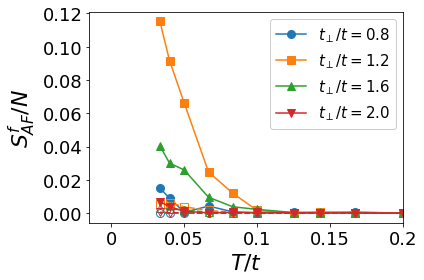

In [7]:
Vs = [2.0] #1.2, 1.6, 2.0, 2.4, 2.8]
tperps = [0.8, 1.2, 1.6, 2.0]
betas = [1.0, 1.2, 1.5, 1.6, 2.0, 2.2, 2.5, 2.8, 3.0, \
         3.2, 3.5, 4.0, 4.2, 5.0, 6.0, 7.0, 8.0, 10.0, 12.0, 15.0, 20.0, 25.0, 30.0]#, 35.0, 40.0]
betas = [1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 12.0, 15.0, 20.0, 25.0, 30.0]#, 40.0]

clf()
for iV in range(0,len(Vs)):
    V = Vs[iV]
    for ip in range(0,len(tperps)):
        tp = tperps[ip]
        Ts = []; saf1 = []; saf2 = []
        
        data_extracted = './data/Saf_inf_vs_T_U'+str(U)+'_V'+str(V)+'_tp'+str(tp)+'_s1234567_mu0.0.txt'

        if os.path.isfile(data_extracted):
            os.remove(data_extracted)
                
        for ibe in range(0,len(betas)):
            be = betas[ibe]
            
            data = './data/Saf_inf_U'+str(U)+'_be'+str(be)+'_s1234567_mu0.0.txt'

            if os.path.isfile(data):
                a = loadtxt(data, skiprows=0)

                for i in range(0,len(a)):
                    if a[i,0]==V and a[i,1]==tp:
                        # manually modify some data for smooth curve:
#                         if a[i,0]==2.0 and a[i,1]==0.9:
#                             a[i,2]=0.02

#                         if a[i,0]==1.6 and a[i,1]==1.5:
#                             continue

                        Ts.append(1./be)
                        saf2.append(abs(a[i,2]))
                        saf1.append(abs(a[i,3]))

        if len(Ts)>0:
            plot(Ts, saf2,'-', marker=Ms[ip], color=colors[ip], markersize=8, \
                 label='$t_{\perp}/t=$'+str(tp))
            plot(Ts, saf1,'--', marker=Ms[ip], color=colors[ip], markersize=8, markerfacecolor='None')

        #title('U'+str(U)+'_V='+str(Vs[iV])+r'_$t_{\perp}=$'+str(tperp))
        legend(loc='best', fontsize=15, framealpha=1.0)
        #grid('on')
        #legend(bbox_to_anchor=[1.01, 0.5], loc='best', fontsize=8, framealpha=1.0)
        #text(0.08, 0.13, '(b)', fontsize=26)
        #xlim([0, 0.1])
        #ylim([0, 0.2])
        #ylim(ymin=0)
        xticks([0, 0.05, 0.1, 0.15, 0.2], [0, 0.05, 0.1, 0.15, 0.2])
        #xticks(tperps,tperps)
        #xscale('log')
        xlim(xmax=0.2)
        xticks(fontsize=18)
        yticks(fontsize=18)
        #plt.tick_params(axis='x',          # changes apply to the x-axis
        #                which='both',      # both major and minor ticks are affected
        #                bottom=False,      # ticks along the bottom edge are off
        #                top=False,         # ticks along the top edge are off
        #                labelbottom=False) # labels along the bottom edge are off

        ylabel('$S^f_{AF}/N$',fontsize=22) # staggered magnetization
        xlabel('$T/t$',fontsize=22)

        plt.tight_layout()
        savefig("Saf_inf_vs_T_U"+str(U)+".pdf")